Class Labels and Encoded Values:
No: 0
Yes: 1
Epoch 1/10
1262/1262 [==============================] - 11s 6ms/step - loss: 0.3078 - accuracy: 0.8959 - val_loss: 0.2514 - val_accuracy: 0.9090
Epoch 2/10
1262/1262 [==============================] - 6s 5ms/step - loss: 0.2662 - accuracy: 0.9047 - val_loss: 0.2747 - val_accuracy: 0.9088
Epoch 3/10
1262/1262 [==============================] - 8s 6ms/step - loss: 0.2587 - accuracy: 0.9054 - val_loss: 0.2413 - val_accuracy: 0.9106
Epoch 4/10
1262/1262 [==============================] - 6s 5ms/step - loss: 0.2528 - accuracy: 0.9067 - val_loss: 0.2385 - val_accuracy: 0.9126
Epoch 5/10
1262/1262 [==============================] - 8s 6ms/step - loss: 0.2465 - accuracy: 0.9082 - val_loss: 0.2368 - val_accuracy: 0.9137
Epoch 6/10
1262/1262 [==============================] - 6s 5ms/step - loss: 0.2411 - accuracy: 0.9088 - val_loss: 0.2302 - val_accuracy: 0.9126
Epoch 7/10
1262/1262 [==============================] - 8s 7ms/step - loss: 0.2371 - accu

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1262/1262 [==============================] - 9s 7ms/step - loss: 0.2245 - accuracy: 0.9125 - val_loss: 0.2206 - val_accuracy: 0.9197
Epoch 2/10
1262/1262 [==============================] - 7s 6ms/step - loss: 0.2220 - accuracy: 0.9139 - val_loss: 0.2169 - val_accuracy: 0.9200
Epoch 3/10
1262/1262 [==============================] - 7s 5ms/step - loss: 0.2178 - accuracy: 0.9154 - val_loss: 0.2148 - val_accuracy: 0.9211
Epoch 4/10
1262/1262 [==============================] - 7s 6ms/step - loss: 0.2145 - accuracy: 0.9165 - val_loss: 0.2145 - val_accuracy: 0.9159
Epoch 5/10
1262/1262 [==============================] - 7s 5ms/step - loss: 0.2097 - accuracy: 0.9172 - val_loss: 0.2112 - val_accuracy: 0.9206
Epoch 6/10
1262/1262 [==============================] - 8s 6ms/step - loss: 0.2029 - accuracy: 0.9185 - val_loss: 0.2029 - val_accuracy: 0.9202
Epoch 7/10
1262/1262 [==============================] - 6s 5ms/step - loss: 0.1952 - accuracy: 0.9215 - val_loss: 0.1947 - val_accuracy: 0.9240
Epo

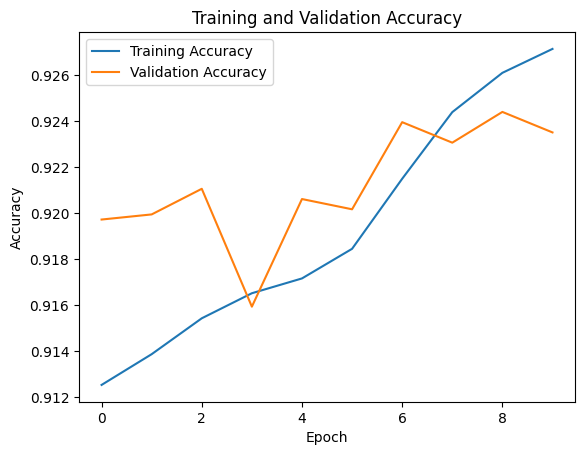

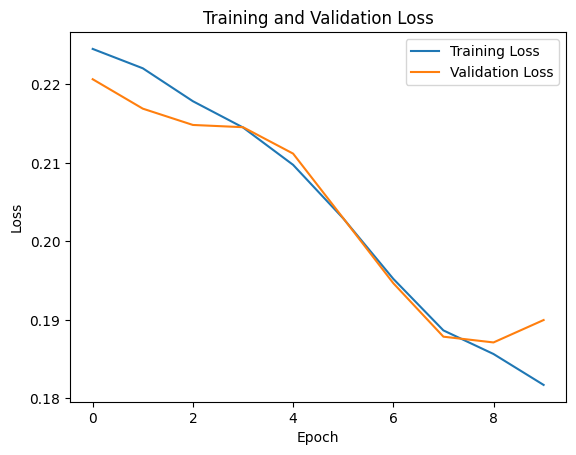

351/351 [==============================] - 1s 3ms/step - loss: 0.1927 - accuracy: 0.9253
Test Accuracy: 0.9252586364746094


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Read data
df = pd.read_csv('merged_pothole_data.csv')

# Assume you have sequential data, and 'ispothole' is the target column
X = df.drop(columns=['ispothole']).values

# Encode string labels to numeric values
label_encoder = LabelEncoder()
df['ispothole'] = label_encoder.fit_transform(df['ispothole'])
classes_and_encoded_values = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Class Labels and Encoded Values:")
for label, encoded_value in classes_and_encoded_values.items():
    print(f"{label}: {encoded_value}")
y = df['ispothole'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input (assuming a 3D input with sequence length, features, and 1 timestep)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Save the model
model.save('lstm_model.h5')
import matplotlib.pyplot as plt

# Train the model and get the history object
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')
